In [3]:
import numpy as np
import torch
import torch.nn as nn
from datasets import Array3D, ClassLabel, Features, load_dataset
from matplotlib import pyplot
from numpy import inf
from sklearn.utils.class_weight import compute_class_weight
from torchinfo import summary
from tqdm import tqdm
from transformers import AdamW, ViTFeatureExtractor, ViTModel

/home/nomura/ML/env_tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
2024-03-27 12:18:14.193213: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-27 12:18:14.669961: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable t

Generating test split: 100%|██████████| 10000/10000 [00:00<00:00, 153381.87 examples/s]


Shape:  (32, 32, 3)
Animal:  cat


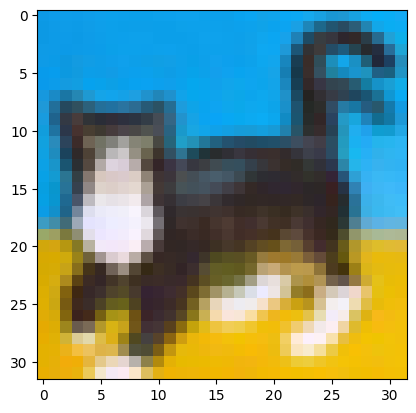

In [4]:
# load cifar10 
train_ds, test_ds = load_dataset('cifar10', split=['train[:5000]', 'test[:2000]'])
# split up training into training + validation
splits = train_ds.train_test_split(test_size=0.1)
train_ds = splits['train']
val_ds = splits['test']
chk_img = train_ds[67]
img = np.array(chk_img['img'])
print("Shape: ", img.shape)
cats = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print("Animal: ", cats[chk_img['label']])
pyplot.imshow(img, cmap=pyplot.get_cmap('gray'))

In [5]:
def preprocess_images(examples):
    # get batch of images
    images = examples['img']
    # convert to list of NumPy arrays of shape (C, H, W)
    images = [np.array(image, dtype=np.uint8) for image in images]
    images = [np.moveaxis(image, source=-1, destination=0) for image    in images]
    # preprocess and add pixel_values
    inputs = feature_extractor(images=images)
    examples['pixel_values'] = inputs['pixel_values']
    return examples

In [6]:
features = Features({
    'label': ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']),
    'img': Array3D(dtype="int64", shape=(3,32,32)),
    'pixel_values': Array3D(dtype="float32", shape=(3, 224, 224)),
})
preprocessed_train_ds = train_ds.map(preprocess_images, batched=True, features=features)
preprocessed_val_ds = val_ds.map(preprocess_images, batched=True, features=features)
preprocessed_test_ds = test_ds.map(preprocess_images, batched=True, features=features)
# set format to PyTorch
preprocessed_train_ds.set_format('torch', columns=['pixel_values', 'label'])
preprocessed_val_ds.set_format('torch', columns=['pixel_values', 'label'])
preprocessed_test_ds.set_format('torch', columns=['pixel_values', 'label'])
preprocessed_train_ds


Map:   0%|          | 0/4500 [00:00<?, ? examples/s]


NameError: name 'feature_extractor' is not defined